In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
data = pd.read_csv("fake_or_real_news.csv")

In [ ]:
data

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
data['fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)
data = data.drop("label", axis=1)

In [ ]:
X, y = data["text"], data["fake"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

TF-IDF: Term Frequency - Inverse Document Frequency

A metric that indicates how important a word is to a document in a collection. It weighs the improtance of each word in a document based on how often it appears in that document and how often it appears accross all documents in the collection.

TF: Number of times a term t appears in a document
IDF: Logarithm of total number of documents divided by no. of docs that contain term
TF-IDF: TF * IDF

Basically allows us to find the most relevant and distinctive words per document.

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
clf = LinearSVC()  # Linear SVC is considered one of the best text classification algorithms
clf.fit(X_train_vectorized, y_train)

LinearSVC()

In [ ]:
clf.score(X_test_vectorized, y_test)

0.9344909234411997

In [ ]:
article_text = X_test.iloc[10]
vectorized_text = vectorizer.transform([article_text])

In [ ]:
clf.predict(vectorized_text)

array([1], dtype=int64)

In [ ]:
y_test.iloc[10]

1

In [ ]:
# Generate a random index within the range of X_test
random_index = random.randint(0, len(X_test) - 1)

# Select a random article using the generated index
article_text = X_test.iloc[random_index]
vectorized_text = vectorizer.transform([article_text])

# Predict
predicted_value = clf.predict(vectorized_text)[0]

# Actual value
actual_value = y_test.iloc[random_index]

# Comparison and output
if predicted_value == actual_value:
    print("The answer is correct.")
else:
    print("The answer is incorrect.")



The answer is correct.


In [ ]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Find indices where predictions and actual labels differ
mismatch_indices = np.where(predictions_array != actual_labels_array)[0]

# Print each mismatch with its index
for index in mismatch_indices:
    print(f"Index: {index}, Predicted: {predictions_array[index]}, Actual: {actual_labels_array[index]}")
    print(f"Text: {X_test.iloc[index]}\n")


Index: 2, Predicted: 0, Actual: 1
Text: Shouts of ‘Not my president!’ in California, following Trump victory 11/09/2016 
PBS 
Moments after Donald Trump’s stunning victory over Hillary Clinton for the White House, protests erupted in California and other states, including people crying “Not my president!” 
The Los Angeles Times and other media outlets reported anti-Trump protesters amassing around the campuses of the University of California, Santa Barbara, and UC San Diego, among others. 
In Oakland, the overnight protests led to a partial closure of the Bay Area Rapid Transit, or BART, the Times reported. 
Photos and videos on social media captured the protesters marching and yelling “Who’s got the power? We got the power,” “Not my president!” and other anti-Trump chants filled with expletives . 
UCSB student newspaper the Daily Nexus reported that hundreds of students left their dorms to protest. In the video captured by the paper below, one student is seen carrying a Mexican flag. 

In [ ]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Initialize lists for false negatives and false positives
false_negatives = []
false_positives = []

# Iterate over the predictions and actual labels
for i in range(len(predictions_array)):
    if predictions_array[i] == 0 and actual_labels_array[i] == 1:
        # False Negative
        false_negatives.append(i)
    elif predictions_array[i] == 1 and actual_labels_array[i] == 0:
        # False Positive
        false_positives.append(i)

In [ ]:
# Print False Negatives
print("False Negatives: ACTUALLY FAKE")
for index in false_negatives:
    print(f"Index: {index}, Text: {X_test.iloc[index]}")
    print()


False Negatives: ACTUALLY FAKE
Index: 2, Text: Shouts of ‘Not my president!’ in California, following Trump victory 11/09/2016 
PBS 
Moments after Donald Trump’s stunning victory over Hillary Clinton for the White House, protests erupted in California and other states, including people crying “Not my president!” 
The Los Angeles Times and other media outlets reported anti-Trump protesters amassing around the campuses of the University of California, Santa Barbara, and UC San Diego, among others. 
In Oakland, the overnight protests led to a partial closure of the Bay Area Rapid Transit, or BART, the Times reported. 
Photos and videos on social media captured the protesters marching and yelling “Who’s got the power? We got the power,” “Not my president!” and other anti-Trump chants filled with expletives . 
UCSB student newspaper the Daily Nexus reported that hundreds of students left their dorms to protest. In the video captured by the paper below, one student is seen carrying a Mexican

In [ ]:
# Print False Positives
print("\nFalse Positives: ACTUALLY REAL")
for index in false_positives:
    print(f"Index: {index}, Text: {X_test.iloc[index]}")
    print()


False Positives: ACTUALLY REAL
Index: 36, Text: JERUSALEM, Israel -- The confrontation between Russia and Turkey entered its second day after Turkey shot down a Russian fighter jet on its border Tuesday.

Turkey's president said he didn't want to escalate the situation, but he needed to protect Turkey's borders and defend its allies inside Syria.

Russia's Ministry of Defense condemned the attack and announced three steps it would take after the incident: bombing attacks would be escorted by fighter jets, air defenses would be increased, and military contacts with Turkey would be suspended.

After the attack, Russian President Vladimir Putin used exceptionally strong language. He called the incident a "stab in the back" and promised "significant consequences" to Turkey.

He said Russia would not tolerate such atrocities. Russia's foreign minister cancelled his upcoming trip to Turkey.

As tensions rise over Turkey's downing of a Russian warplane, CBN's Erick Stakelbeck discusses how P

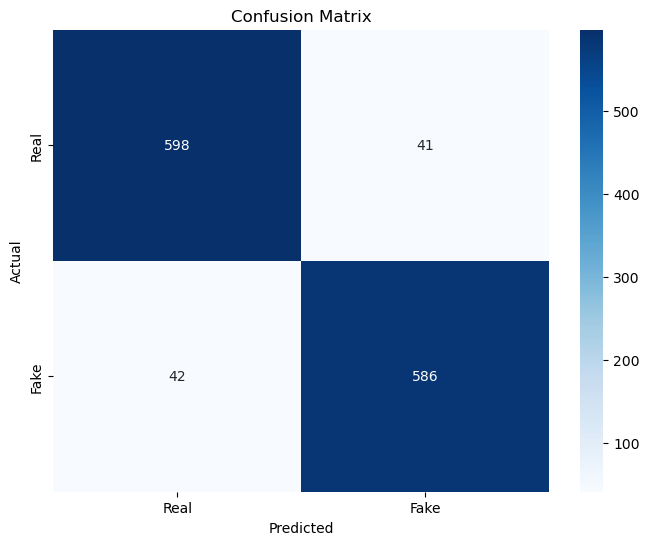

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
